In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [11]:
from matplotlib import font_manager, rc
# matplotlib 에 맑은고딕 폰트 적용
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

In [12]:
[(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'Malgun' in f.name]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'c:\\windows\\fonts\\malgun.ttf')]

wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃을 사용<br>
x 축에 세 개의 데이트 데이터를 흐린 별 모양으로 표시

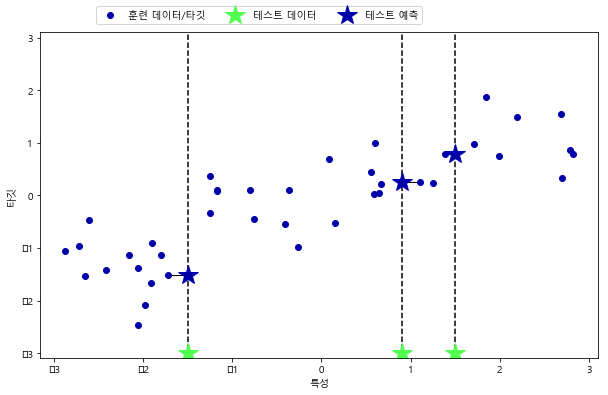

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

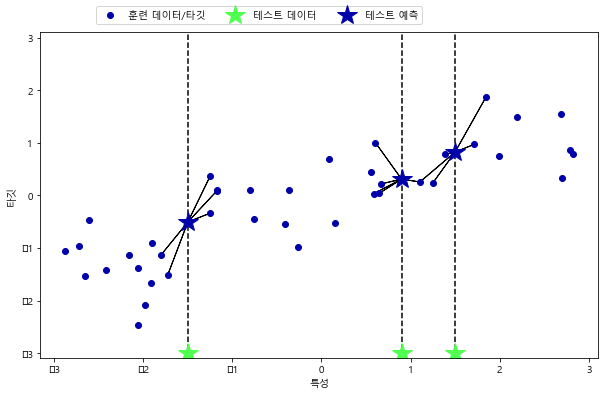

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=5)
## 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측이됨

## scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어 있음

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듬
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [29]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [30]:
# score 메서드는 회귀일 때 R^2값을 반환합니다.
# 결정 계수라고도 하는 R^2값은 회귀 모델에서 예측 적합도를 0과 1사이의 값으로 계산한 것
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### 2.3.3 선형 모델
선형 모델은 입력 특성에 대한 **선형 함수**를 만들어 예측을 수행함<br>
y = w[0] * x[0] + w[1] * x[1] ... w[p] * x[p] + b;<br>
x[0] ~ x[p] 까지는 하나의 데이터 포인트에 대한 특성을 나타내며, w와 b는 모데링 학습할 파라미터가 됨<br>
그리고 y는 모델이 만들어낸 예측값

w[0]: 0.393906  b: -0.031804


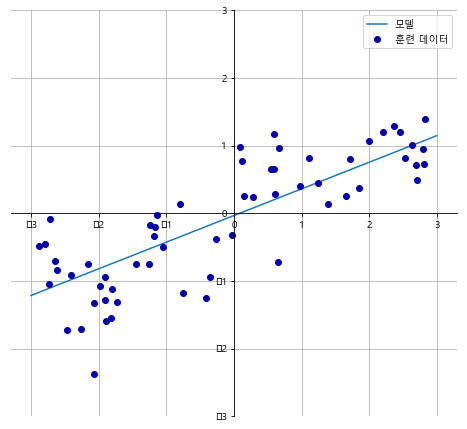

In [31]:
# wave 데이터 셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시키기!
mglearn.plots.plot_linear_regression_wave()
# w[0] 은 대략 4이므로, 기울기가 4인 것을 알 수 있음

> 타깃 y가 특성들의 선형 조합이라는 것은 매우 과한 가정처럼 보이지만 1차원 데이터만 놓고 봐서 생긴 편견 일 수 있음<br>특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있음. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 선형 함수로 모델링 할 수 있음

### 선형모델은 다양하며, 이 모델들은 훈련 데이터로부터 모델 파라미터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가남

### 선형 회귀(최소 제곱법)
선형 회귀는 `예측`과 훈련 세트에 있는 `타깃 y`사이의 **평균제곱오차(mean squared error)** 를 최소화하는 파라미터 w와 b를 찾습니다.<br>
(평균 제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나누는 것)<br>
=> 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없음

In [32]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

**기울기 파라미터(w)** 는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_속성에 저장되어 있음<br>
**파라미터(b)** 는 편향(offset) 또는 절편(intercept)라고 하며 intercept_속성에 저장되어 있음

In [33]:
print("lr.coef_(w) : {}".format(lr.coef_))
print("lr.intercept_(b): {}".format(lr.intercept_))

lr.coef_(w) : [0.39390555]
lr.intercept_(b): -0.031804343026759746


In [34]:
## 성능 확인
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


R^2 값이 그리 좋지않고 훈련세트나 테스트세트의 점수가 매우 비슷한 것으로 보아 이는 과소 적합임을 알수 있다

1차원 모델에서는 모델이 단순하므로 과대적합을 걱정할 경우는 거의 없으며 고차원 데이터 세트의 경우는 선형 모델의 성능이 매우 높아 과대적합이 되는 경우가 많음